## **Problem Statement-**<br>
A telecom company had collected data about historical Customer Churns along with respective information for each customer. <br>
You need to build a model that will help this company by predicting the probability that a customer will churn.<br>
Some pointers:<br>
1.	Focus on all steps of data science (EDA, data processing, model, evaluation, charts)<br>
2.	Highlight any trend in data, deep insight, novel steps that you take<br>
3.	Highlight next steps, improvements<br>
4.	Project should take 4-6 hours approx<br>
5.	Submit the Python notebook with code, comments, graphs <br>
**Data Information** <br>

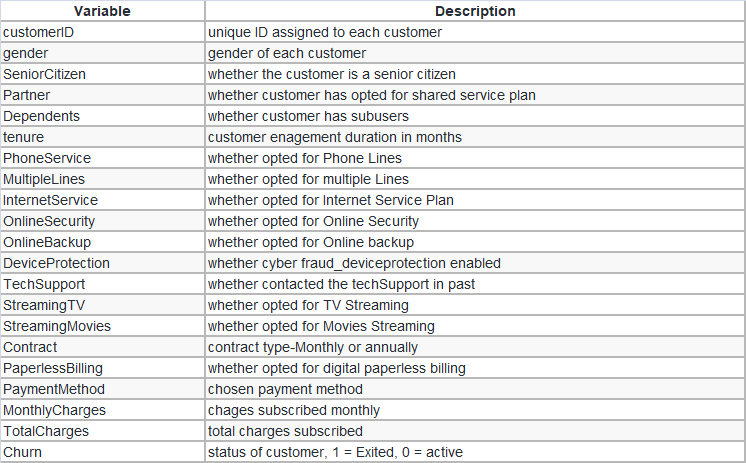



### Importing Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 

#### Reading the dataset provided. The dataset is in .csv format.

In [2]:
import os
os.getcwd() #checking current woreking directory

'C:\\Users\\lenovo\\Documents\\Accenture'

In [3]:
os.chdir('C:\\Users\\lenovo\\Documents\\Ajay') #changing working directory

In [4]:
df = pd.read_csv('TELECOM_DATASET.csv') 

In [5]:
df.shape #It defines the shape of the dataset. 7043 rows and 21 columns.

(7043, 21)

In [6]:
df.head().T #reading the top records of the dataset(by default the max view is set at 5 rows.)

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1.0,34.0,2.0,45.0,2.0
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,NaN,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.dtypes #Understanding the datatypes of the features.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df['customerID'].isnull().sum() #customer ID is the primary key. Checking for missing values.

0

In [9]:
df.isnull().sum() #Checking for overall missing values.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     2
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df[df.InternetService.isnull()] #Filtering the Missing values for feature-'InternetService'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,NaN,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
26,6467-CHFZW,Male,0,Yes,Yes,47.0,Yes,Yes,NaN,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes


In [11]:
df['InternetService'].dtype #checking datatype for feature-'InternetService'.

dtype('O')

In [12]:
df.InternetService.unique() #categories of the feature

array(['DSL', nan, 'Fiber optic', 'No'], dtype=object)

In [13]:
filter1 = df[df['PhoneService']== 'Yes'] #relating the InternetService with PhoneService.
#The missing values are for those records where PhoneService is enabled.
filter1.InternetService.mode()[0]
#Finding the most repeatitive value.

'Fiber optic'

In [14]:
df['InternetService'] = df['InternetService'].fillna('Fiber optic') #Filling the null values with most repeatitive value.

In [15]:
df[df.tenure.isnull()] #Filtering missing value records for feature-'tenure'.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
13,0280-XJGEX,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
24,6322-HRPFA,Male,0,Yes,Yes,NaN,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No
42,9867-JCZSP,Female,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


In [16]:
df_num = df.select_dtypes(include = ['int64', 'float64']) #separating only numerical features.

In [17]:
corr = df_num.corr() #finding correlation matrix.

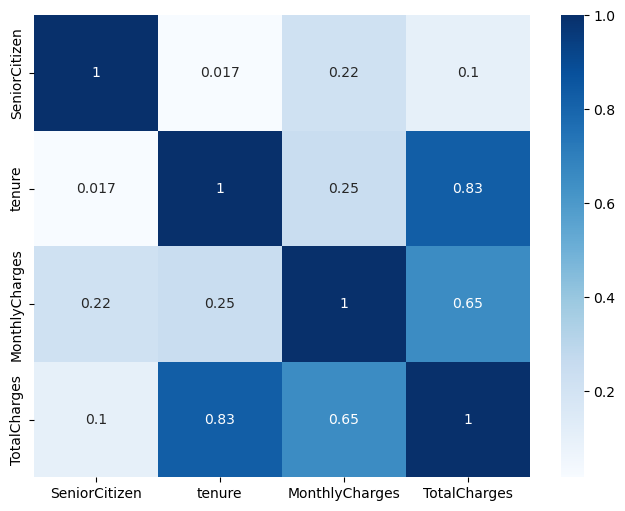

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap = 'Blues', annot = True) #heatmap.
plt.show()

Observed a strong positive relation between TotalCharges and tenure.

In [19]:
df_num.TotalCharges.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.7,0.8,0.85,0.9,0,0.95,0.99]).T

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
0%         18.800000
1%         19.871000
5%         49.070000
10%        83.470000
25%       398.550000
30%       548.400000
40%       939.780000
50%      1394.550000
60%      2043.710000
70%      3132.750000
80%      4471.440000
85%      5195.485000
90%      5973.690000
95%      6921.025000
99%      8039.256000
max      8684.800000
Name: TotalCharges, dtype: float64

**Observation - 85 percentile of users pay equal to or less than 5195.6 and 60 percentile of users pay less than equal to 2043.71**.
<br>Our Missing values belong to multiple segments/bins.

In [20]:
df[df.tenure.isnull()] #Filtering missing value records for feature-'tenure'.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
13,0280-XJGEX,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
24,6322-HRPFA,Male,0,Yes,Yes,NaN,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No
42,9867-JCZSP,Female,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


In [21]:
a  = df[df_num.TotalCharges > df_num.TotalCharges.quantile(0.85)]
a.tenure.median() # median tenure of users paying more than 5k.

68.0

In [22]:
b = df[df_num.TotalCharges < df_num.TotalCharges.quantile(0.6)]
b.tenure.median() #average tenure of users paying less than 2k.

12.0

In [23]:
#filling missing values with average tenures received after segmentation.

condition_high = df['TotalCharges'] > df['TotalCharges'].quantile(0.75)
condition_low = df['TotalCharges'] < df['TotalCharges'].quantile(0.75)

df['tenure'] = df['tenure'].fillna(pd.Series(np.where(condition_high, 68.00, df_num['tenure'])))
df['tenure'] = df['tenure'].fillna(pd.Series(np.where(condition_low, 12.00, df_num['tenure'])))

In [24]:
df.isnull().any()
#Missing Values are treated

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [25]:
df=df.drop(['customerID'],axis=1) # Dropping ID Feature from the dataset due to less relevance in prediction.

In [26]:
df['Churn'].value_counts() #finding number of churning cases.
#we have class imbalance problem, we will treat this later.

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [27]:
df['target']= np.where(df['Churn']=="Yes",1,0) ## Labelling the Churn feature to 1/0.

In [28]:
df=df.drop(['Churn'],axis=1) #now, dropping the Churn feature to retain only Target.

#### Defining Target and Independent Features

In [29]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

In [30]:
Y.mean() #this is the Churn Rate.

target    0.26537
dtype: float64

#### Spliting features into Numerical and Categorical.

In [31]:
num=X.select_dtypes(include="number")
cat=X.select_dtypes(include="object")

In [32]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1.0,29.85,29.85
1,0,34.0,56.95,1889.50
2,0,2.0,53.85,108.15
3,0,45.0,42.30,1840.75
4,0,2.0,70.70,151.65


In [33]:
num.SeniorCitizen.unique()
indicator = df.SeniorCitizen #SeniorCitizen has only two unique values, hence separating it from numerical and saving it inside 
#another indicator variable.

In [34]:
num.drop('SeniorCitizen', axis = 1, inplace = True)

In [35]:
num.describe().T #some statistics of numerical features.

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.367883,24.563268,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


In [36]:
cat.head() #readin top records of categorical datatypes.

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [37]:
def no_of_categories(df) :
    cols = df.columns
    [print('Number of unique categories in {} is {}'.format(i, df[i].nunique())) for i in cols]
    [print('Unique Categories of {} are {}'.format(i, df[i].unique())) for i in cols]
no_of_categories(cat)

Number of unique categories in gender is 2
Number of unique categories in Partner is 2
Number of unique categories in Dependents is 2
Number of unique categories in PhoneService is 2
Number of unique categories in MultipleLines is 3
Number of unique categories in InternetService is 3
Number of unique categories in OnlineSecurity is 3
Number of unique categories in OnlineBackup is 3
Number of unique categories in DeviceProtection is 3
Number of unique categories in TechSupport is 3
Number of unique categories in StreamingTV is 3
Number of unique categories in StreamingMovies is 3
Number of unique categories in Contract is 3
Number of unique categories in PaperlessBilling is 2
Number of unique categories in PaymentMethod is 4
Unique Categories of gender are ['Female' 'Male']
Unique Categories of Partner are ['Yes' 'No']
Unique Categories of Dependents are ['No' 'Yes']
Unique Categories of PhoneService are ['No' 'Yes']
Unique Categories of MultipleLines are ['No phone service' 'No' 'Yes']

In [38]:
cat[cat['MultipleLines'] == 'No phone service']
#here we can observe that the category-'No phone service' can be easily defined by feature-PhoneService
#hence, merging it with 'No'

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
7,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check
20,Male,No,No,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check
27,Male,Yes,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,Male,No,No,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check
7007,Male,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
7029,Female,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
7036,Female,No,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check


In [39]:
cat.MultipleLines.replace(to_replace = 'No phone service', value = 'No', inplace = True)
cat.MultipleLines.unique()

array(['No', 'Yes'], dtype=object)

# Outlier Analysis of Numerical Features

In [40]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.367883,24.563268,0.00,0.00,1.000,1.00,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.200,19.65,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,18.80,19.871,49.07,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6921.025,8039.256,8684.80


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14768\2108866052.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


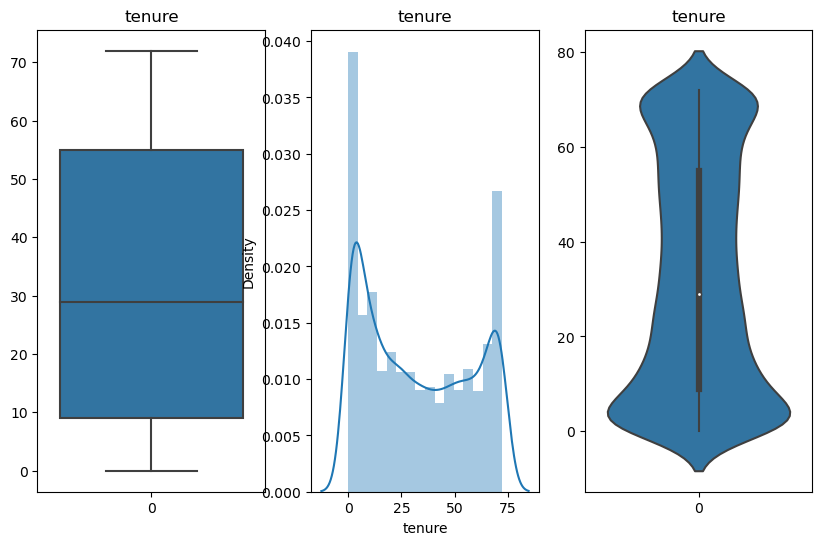

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14768\2108866052.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


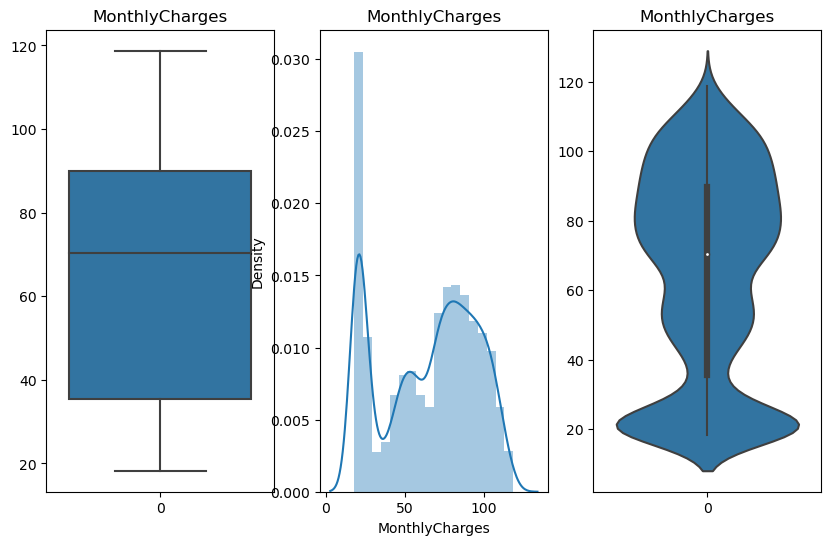

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14768\2108866052.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num[i])


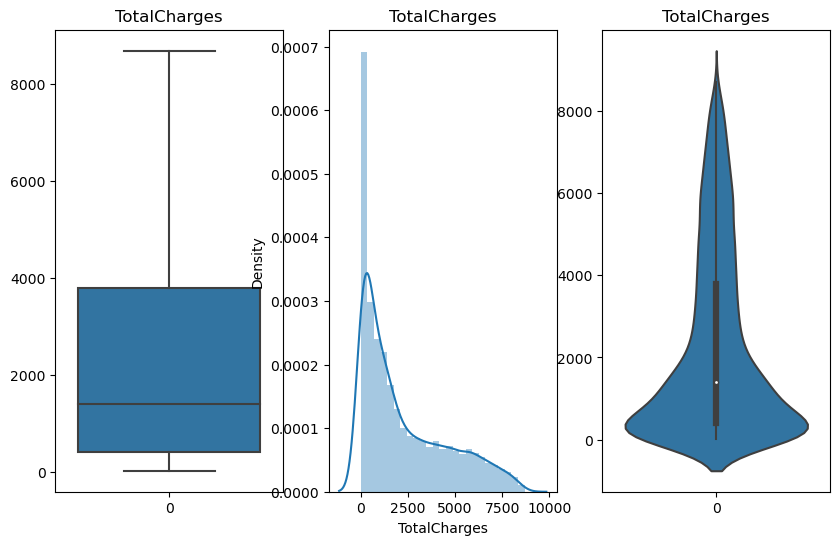

In [41]:
col = num.columns
for i in col :
    plt.figure(figsize=(10,6))
    plt.subplot(1,3,1)
    sns.boxplot(num[i])
    plt.title(i)
    plt.subplot(1,3,2)
    sns.distplot(num[i])
    plt.title(i)
    plt.subplot(1,3,3)
    sns.violinplot(num[i])
    plt.title(i)
    plt.show()
    

In [42]:
#No Significant Outliers observed, however, skewness present.

# Feature Selection - Numerical Features 

**Removing Features with 0 Variance**

In [43]:
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0) #taking threshold as 0 for 0 variance.
varselector.fit_transform(num)

array([[1.0000e+00, 2.9850e+01, 2.9850e+01],
       [3.4000e+01, 5.6950e+01, 1.8895e+03],
       [2.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02],
       [4.0000e+00, 7.4400e+01, 3.0660e+02],
       [6.6000e+01, 1.0565e+02, 6.8445e+03]])

In [44]:
# Getting columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
cols

array([0, 1, 2], dtype=int64)

In [45]:
##all features got selected
num_1 = num.iloc[:,cols]

In [46]:
num_1.iloc[0]#1st row of every column.

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

**Bi Variate Analysis (Feature Discretization)**

In [47]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile') 
#binnig the data into 10, using quantile method. The continuous values divided into 10 discrete bins.

In [48]:
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_binned_Rank')
#creating a DataFrame with binned data, keeping indexes and columns same as num_1 dataframe.
num_binned.head()

,tenure_binned_Rank,MonthlyCharges_binned_Rank,TotalCharges_binned_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


In [49]:
insight = pd.concat((num_1, num_binned), axis = 1)

In [50]:
insight.head()
#here, we can interpret how the values have been added to bins and turned into discrete values.
#this will help in beter visualizaton.

,tenure,MonthlyCharges,TotalCharges,tenure_binned_Rank,MonthlyCharges_binned_Rank,TotalCharges_binned_Rank
0,1.0,29.85,29.85,0.0,2.0,0.0
1,34.0,56.95,1889.50,5.0,3.0,5.0
2,2.0,53.85,108.15,1.0,3.0,1.0
3,45.0,42.30,1840.75,6.0,2.0,5.0
4,2.0,70.70,151.65,1.0,5.0,1.0


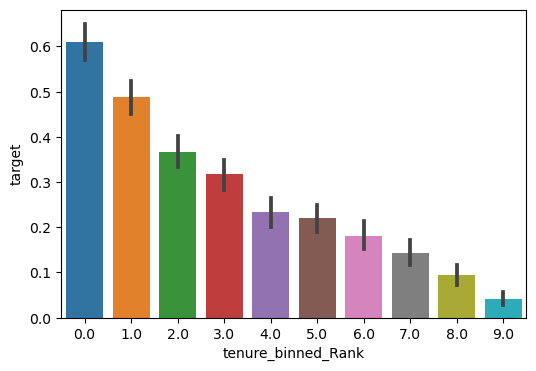

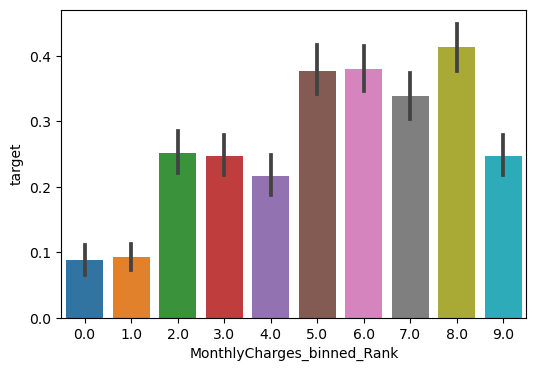

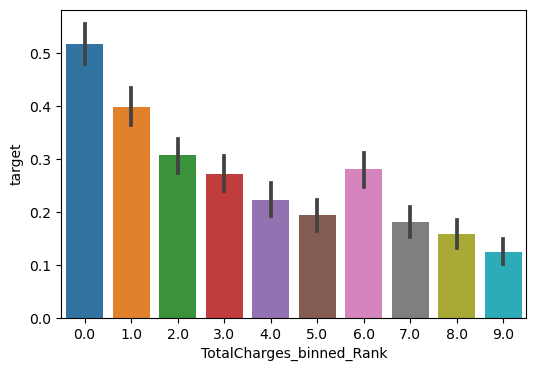

In [51]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='outer')
#joining dataframe with target feature to visualize variance.
from numpy import mean
for col in (num_binned.columns):
    plt.figure(figsize= (6,4))
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator= np.mean )
    #here taking estimator as mean, so that heights of the bars represent avaerage values.
plt.show()

In [52]:
#selecting all the features from numerical features due to good discrimination
select_features_df_num=num_1

# Feature Selection - Categorical Features 

In [53]:
cat.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

**Bi Variate Analysis**

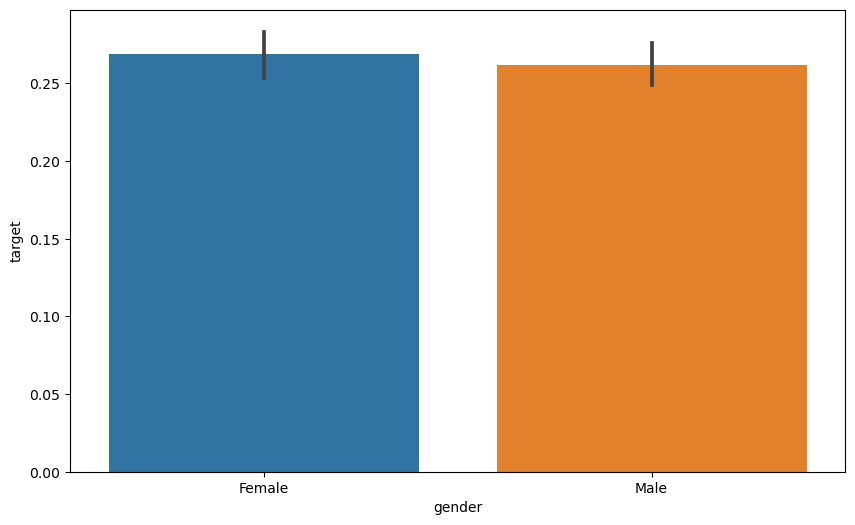

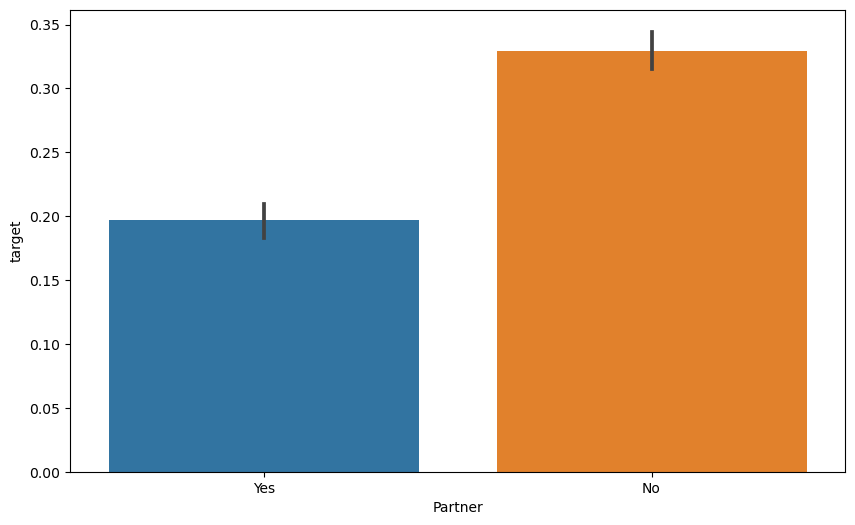

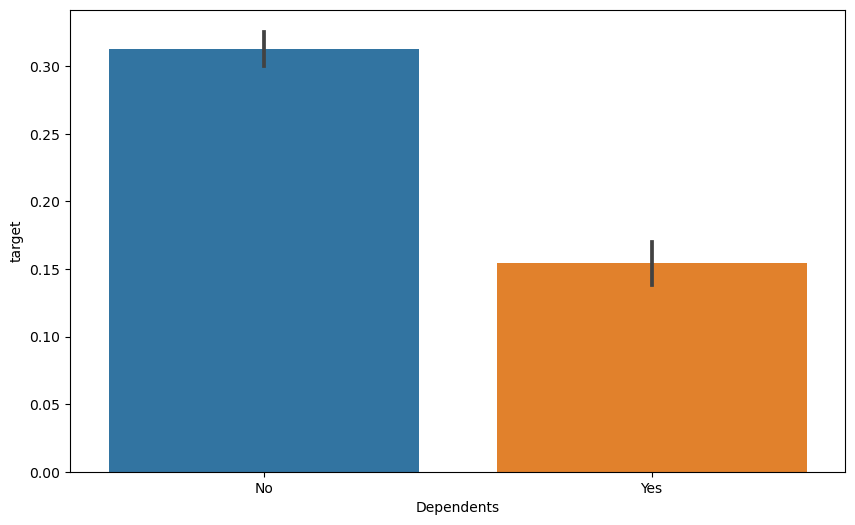

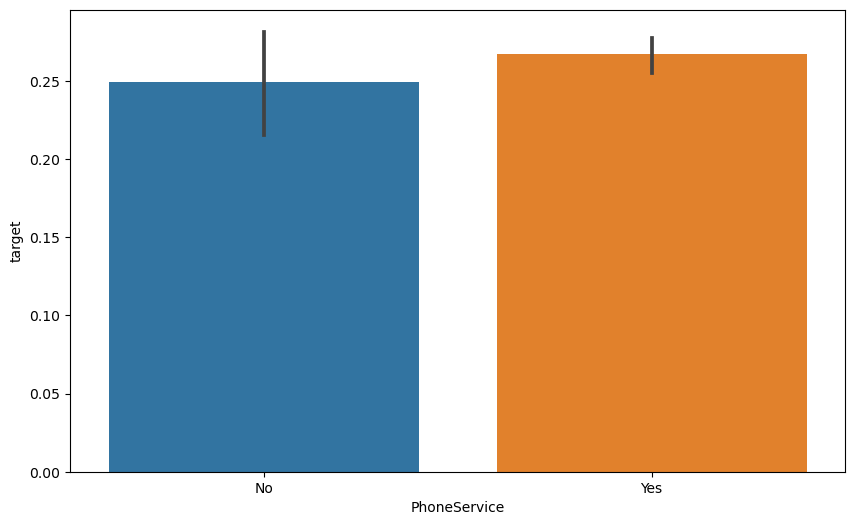

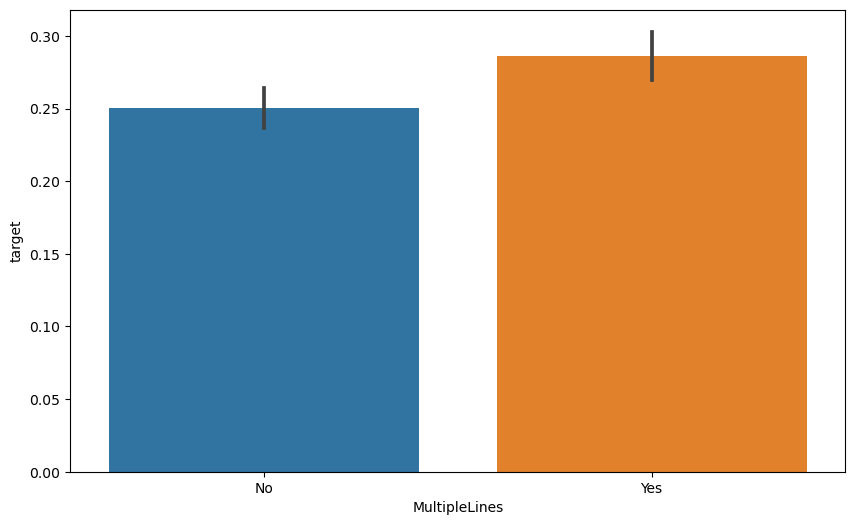

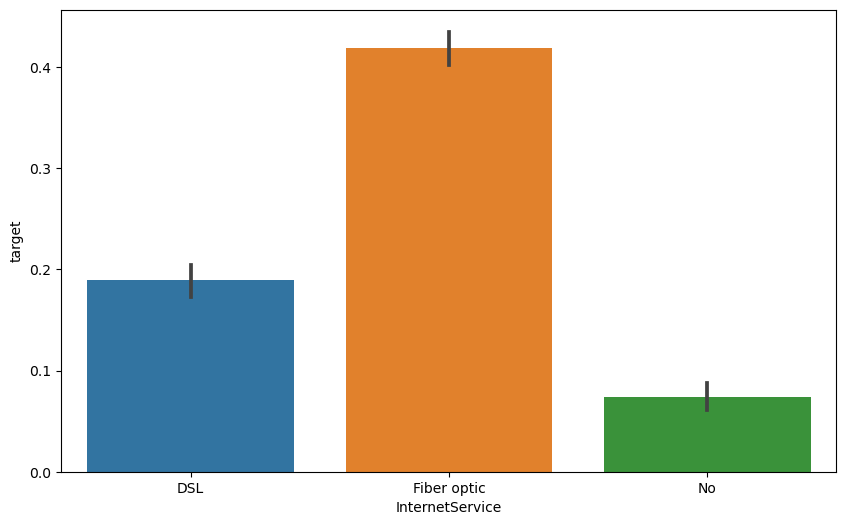

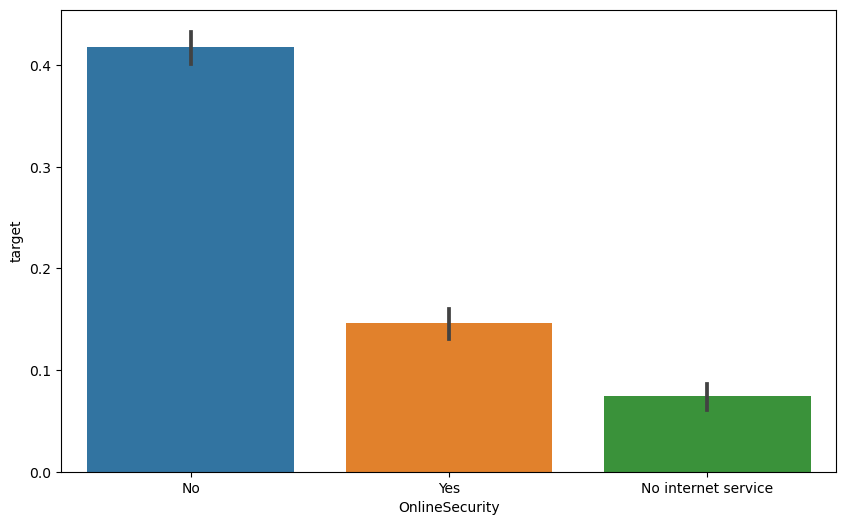

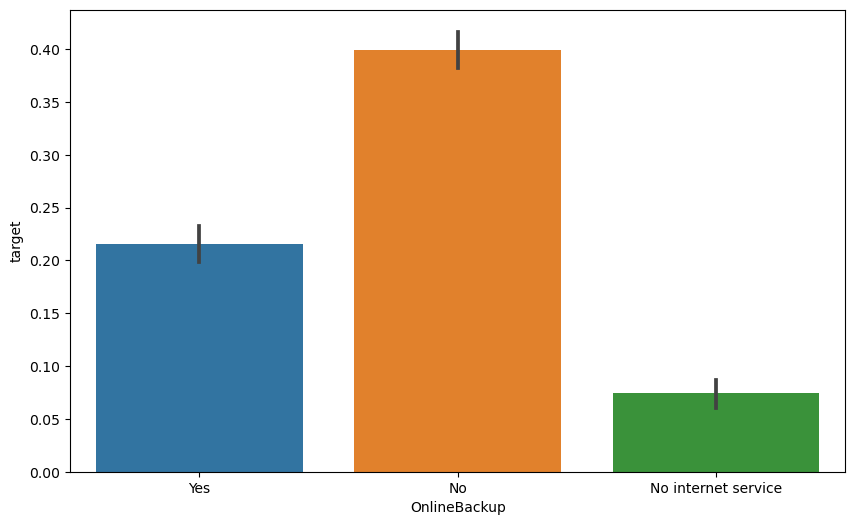

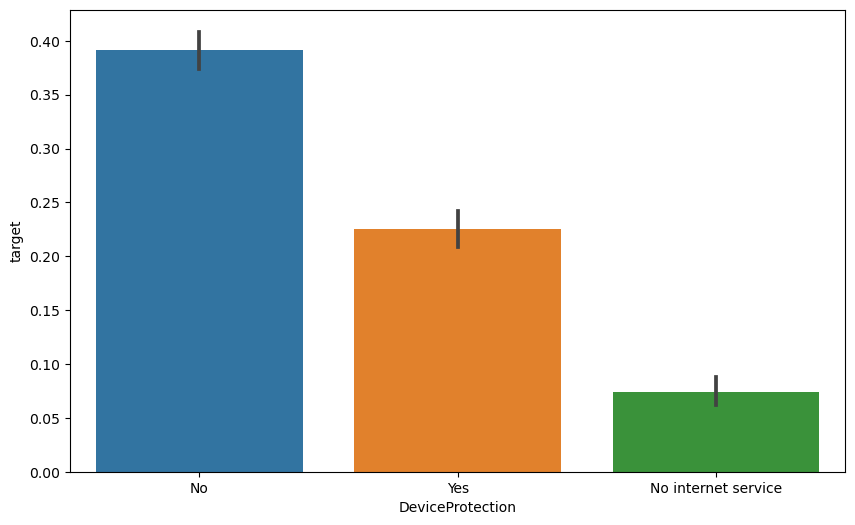

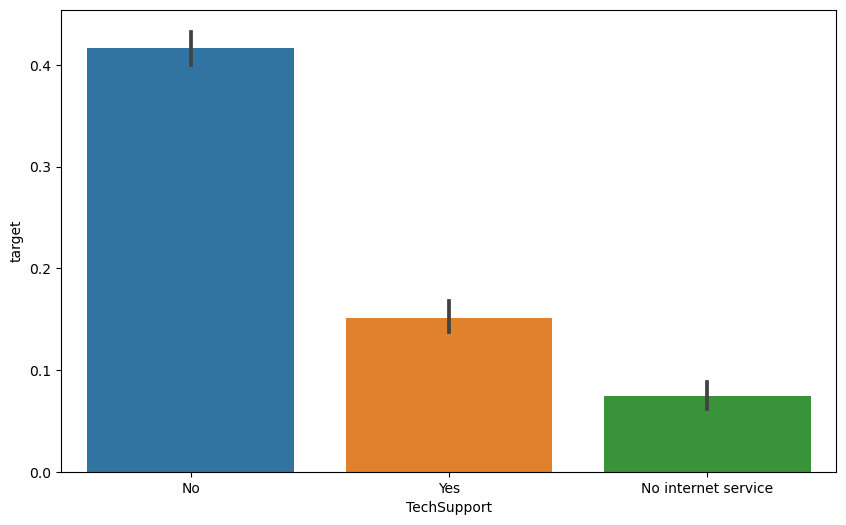

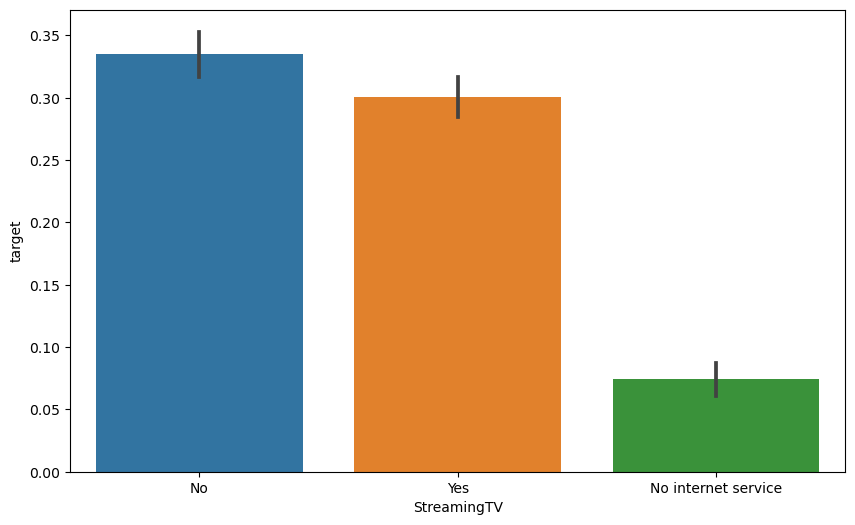

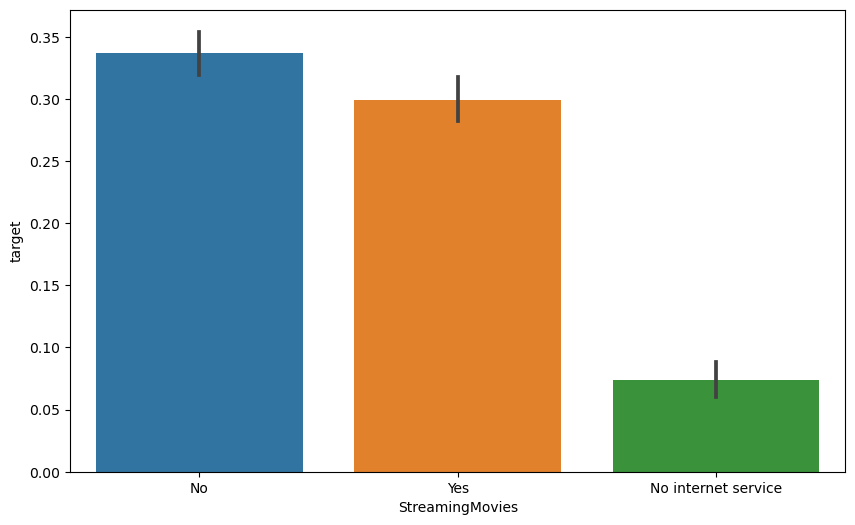

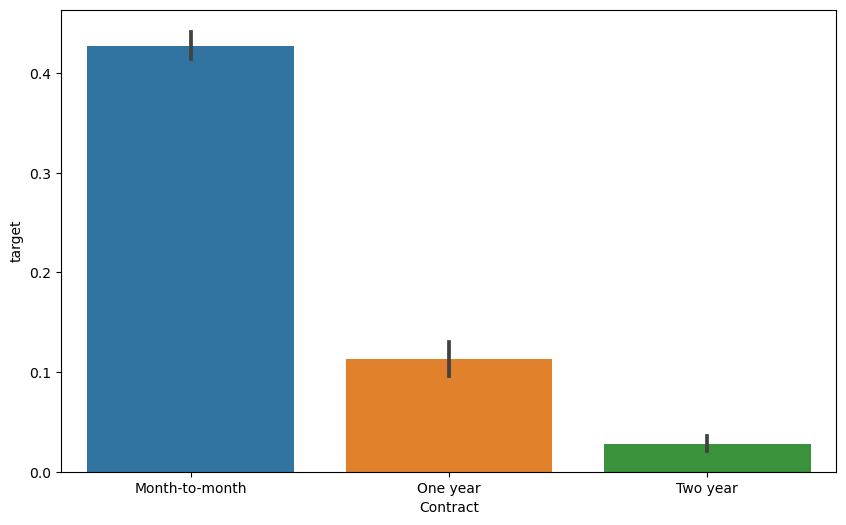

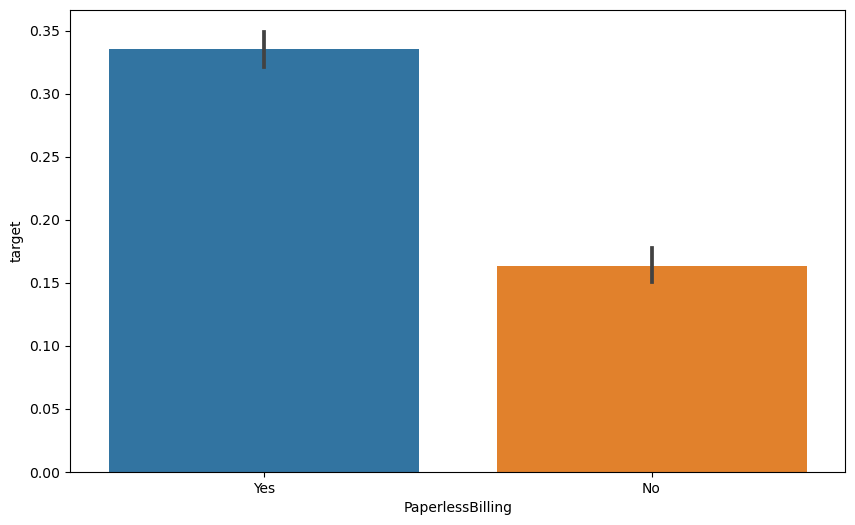

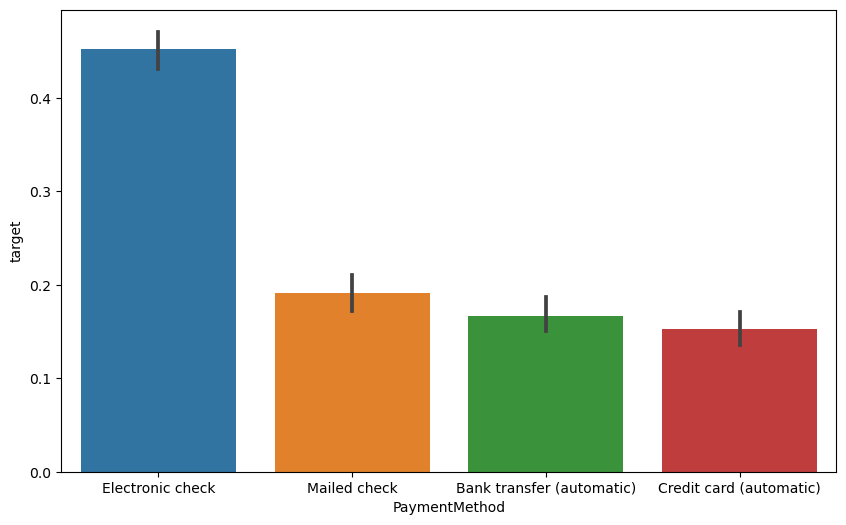

In [54]:
X_cat_merged=pd.concat([Y,cat],axis=1,join='outer')
#joining dataframe with target feature for visualization.
for col in (cat.columns):
    plt.figure(figsize=(10,6))
    sns.barplot(x=col, y="target",data=X_cat_merged, estimator = np.mean )
plt.show()

In [55]:
cat=cat.drop(['gender','PhoneService','MultipleLines'],axis=1)
#dropping these features as they do not show much variation with respect to the target variable.

In [56]:
# Create dummy features.(Encoding)
X_cat_dum = pd.get_dummies(cat, drop_first = True)
X_cat_dum.shape

(7043, 22)

In [57]:
col = X_cat_dum.columns
for i in col :
    X_cat_dum[i] = X_cat_dum[i].astype('int64')
X_cat_dum.head()
#Converting bool values to 0 and 1

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


**Selecting K Best**

In [58]:
# Selecting K Best for Categorical Features.
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
#reducing the dimensonality-Using Chi2 test as score function to check independence of Features w.r.t target and picking top 20.

In [59]:
selector.fit_transform(X_cat_dum, Y)

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [60]:
# Getting the columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

In [61]:
len(cols)

20

In [62]:
#20 out of 22 features got selected as we took K=20
cols

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18,
       19, 20, 21], dtype=int64)

In [63]:
select_features_df_char = X_cat_dum.iloc[:,cols]
#selecting final categorical features

In [64]:
select_features_df_char.iloc[0]
#1st row of every columns

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: int64

In [65]:
select_features_df_char.tail()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7042,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0


#### Creating the Master Feature Set for Model Development

In [66]:
X_all=pd.concat([select_features_df_char,select_features_df_num,indicator],axis=1,join="outer")

In [67]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1.0,29.85,29.85,0
1,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,34.0,56.95,1889.50,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,2.0,53.85,108.15,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,45.0,42.30,1840.75,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,2.0,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,24.0,84.80,1990.50,0
7039,1,1,1,0,0,0,0,1,0,1,...,1,0,1,1,0,0,72.0,103.20,7362.90,0
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,11.0,29.60,346.45,0
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,4.0,74.40,306.60,1


In [68]:
Y['target'].value_counts()

target
0    5174
1    1869
Name: count, dtype: int64

In [69]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [70]:
counter = Y.value_counts()
print(counter)
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto', random_state=42)
X, y = oversample.fit_resample(X_all, Y)
counter = y.value_counts()
print(counter)

#here we have treated the class imbalance issue

target
0         5174
1         1869
Name: count, dtype: int64
target
0         5174
1         5174
Name: count, dtype: int64


#### Preparing the dataset for Model.

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (8278, 24)
Shape of Testing Data (2070, 24)
Response Rate in Training Data target    0.502658
dtype: float64
Response Rate in Testing Data target    0.489372
dtype: float64


## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [74]:
a = pd.Series(logreg.coef_[0]) 
#finding the coefficients of the Logistic regression model.
#Since, it is a binary classification problem, we would only have one column, hence taking index value as 0.

In [75]:
#Converting the array of column names into a dataframe.
coeff_df = pd.DataFrame(X.columns.tolist(), columns = ['Feature_names'])
coeff_df.head()

,Feature_names
0,Partner_Yes
1,Dependents_Yes
2,InternetService_Fiber optic
3,InternetService_No
4,OnlineSecurity_No internet service


In [76]:
#adding a column to add the corresponding coeffient values.
coeff_df["Coefficient Estimate"] = a
coeff_df

,Feature_names,Coefficient Estimate
0,Partner_Yes,-0.182381
1,Dependents_Yes,-0.626700
2,InternetService_Fiber optic,-0.584665
3,InternetService_No,-0.126161
4,OnlineSecurity_No internet service,-0.126161
5,OnlineSecurity_Yes,-1.319610
6,OnlineBackup_No internet service,-0.126161
7,OnlineBackup_Yes,-1.016624
8,DeviceProtection_No internet service,-0.126161
9,DeviceProtection_Yes,-0.833324


**The positive values of coefficient corresponds to class 1, i.e., Positive probability of Churning and vice-versa.**

## Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 1)

In [78]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'criterion':['gini','entropy'],   ##creating parameters for GridSearchCV
    'max_depth': [3, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [50, 100, 150, 200, 250],
    'max_features':[10,15,20,22,23],
    'min_samples_leaf':[50, 100, 300, 500]
        }
#creating hyperparamters for tuning
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist, n_jobs = 10)
#n_jobs greater than 1 to search simultaneously(in parallel) to speed up the process.

In [79]:
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [80]:
dtree=DecisionTreeClassifier(criterion='gini', max_depth = 10 ,min_samples_split=50, max_features = 20, min_samples_leaf = 50, random_state = 1)
dtree.fit(X_train,y_train)
#using the parameters that returned from GridSearchCV

DecisionTreeClassifier(max_depth=10, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, random_state=1)

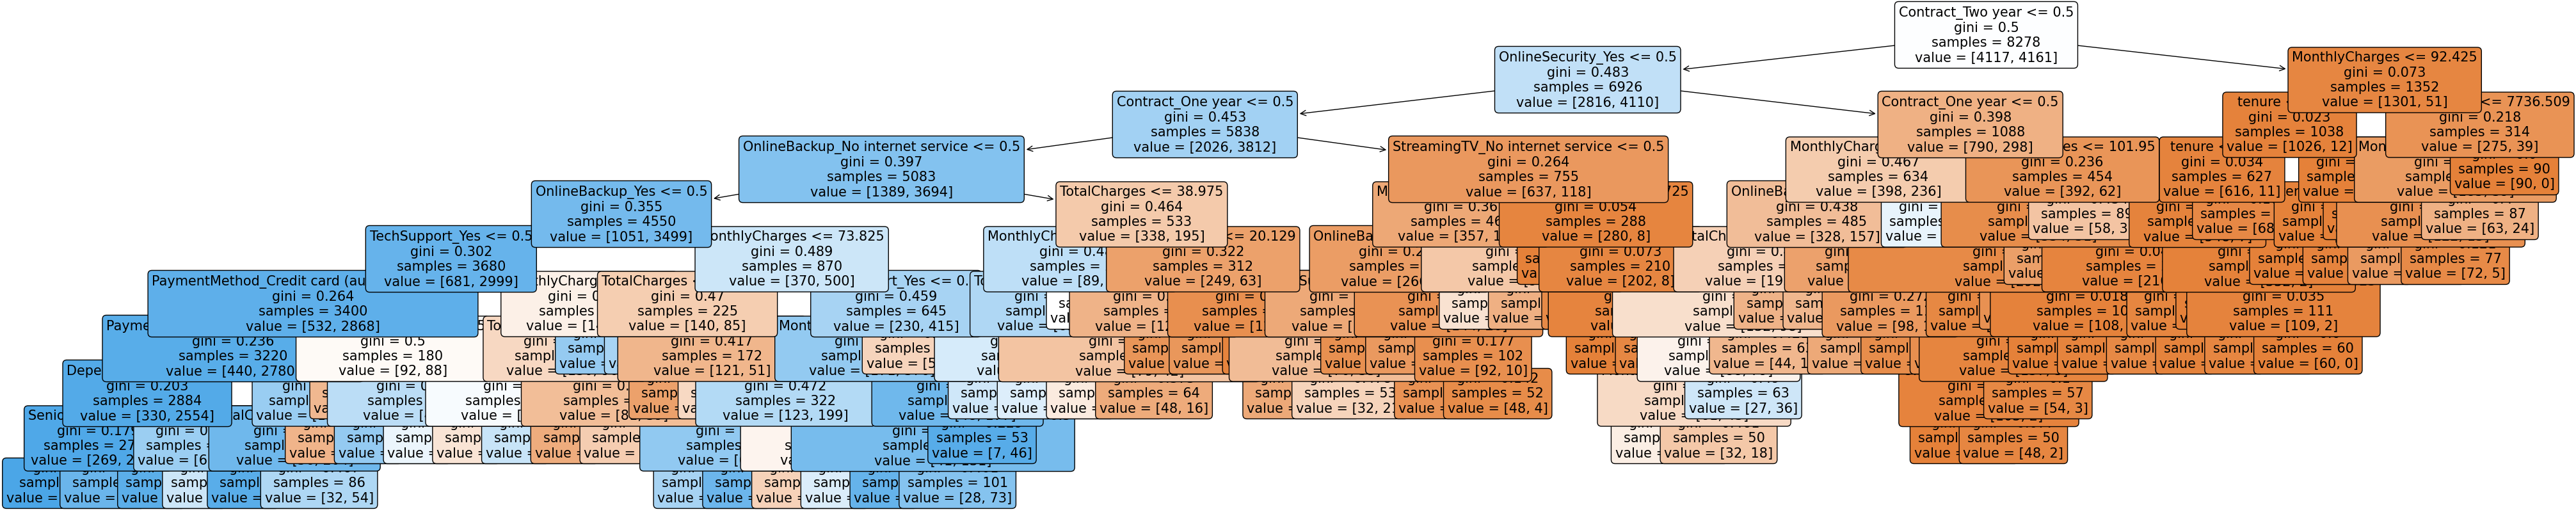

In [81]:
from sklearn import tree
import pydotplus
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X.columns.tolist())
plt.show()

## Random Forest

In [82]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)

In [83]:
#usimg same hyperparamters used for decision tree for tuning
rf_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist, n_jobs = 10)


In [84]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, max_features=20,
                                              min_samples_leaf=50,
                                              min_samples_split=50,
                                              random_state=1),
             n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7, 8, 9, 10],
                         'max_features': [10, 15, 20, 22, 23],
                         'min_samples_leaf': [50, 100, 300, 500],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [85]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [86]:
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=10,max_features= 20, min_samples_split=50, min_samples_leaf = 50)
rf.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, random_state=0)

In [87]:
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance')
feature_importances
#importance of features in predicting the class.

,importance
PaperlessBilling_Yes,0.000907
SeniorCitizen,0.002563
PaymentMethod_Electronic check,0.002841
DeviceProtection_Yes,0.005032
StreamingMovies_No internet service,0.005193
Partner_Yes,0.005379
OnlineSecurity_No internet service,0.005492
OnlineBackup_No internet service,0.006027
InternetService_No,0.007355
DeviceProtection_No internet service,0.007397


## Gradient Boosting Model

In [88]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state = 1)

In [89]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_grid = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = 10)


In [90]:
gb_grid.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=10,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [91]:
print('Best Parameters using grid search: \n', gb_grid.best_params_)

Best Parameters using grid search: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [92]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 5, n_estimators= 150, random_state = 1)

In [93]:
gbm.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=1)

In [94]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.sort_values(by = 'importance', ascending = False).iloc[:5] #top 5 features

,importance
Contract_Two year,0.198781
Contract_One year,0.164331
MonthlyCharges,0.123659
TotalCharges,0.102586
tenure,0.099935


In [95]:
#predicting via different models trained.
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [99]:
#loading metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [100]:
#Logistic_regression metrics
print("Accuracy_score: {} %".format(metrics.accuracy_score(y_test, y_pred_logreg)*100))
print('Precision-the model predicted {} positive instances correctly.'.format(metrics.precision_score(y_test,y_pred_logreg)*100))
print("Recall-the model identified {} % of positive instances.".format(metrics.recall_score(y_test,y_pred_logreg)*100))
print("f1_score-harmonic mean of Precision and Recall : ",metrics.f1_score(y_test,y_pred_logreg)*100, '%')

Accuracy_score: 82.46376811594203 %
Precision-the model predicted 81.19001919385796 positive instances correctly.
Recall-the model identified 83.51431391905231 % of positive instances.
f1_score-harmonic mean of Precision and Recall :  82.33576642335765 %


In [101]:
##creating a function to visualize the metrics
def result(x,y,z) : # x is the model name, y is y actual and z is y predicted
    from sklearn import metrics
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    print(x)
    metrics_dict = {'Accuracy': metrics.accuracy_score,'Precision': metrics.precision_score,'Recall': metrics.recall_score,'F1 Score': metrics.f1_score}
    for metric_name, metric_function in metrics_dict.items():
        score = metric_function(y, z) *100
        print('{}: {} %'.format(metric_name, score))
    cm = confusion_matrix(z,y)
    plt.figure(figsize = (4,3))
    sns.heatmap(cm,annot=True,cmap="viridis", fmt='g')
    plt.title('Confusion Matrix for {}'.format(x))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

Logistic Regression
Accuracy: 82.46376811594203 %
Precision: 81.19001919385796 %
Recall: 83.51431391905231 %
F1 Score: 82.33576642335765 %


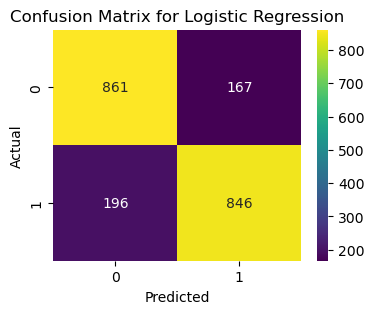

In [102]:
result('Logistic Regression', y_test, y_pred_logreg)

Decision Tree
Accuracy: 80.82125603864733 %
Precision: 80.61630218687873 %
Recall: 80.05923000987167 %
F1 Score: 80.33680039623576 %


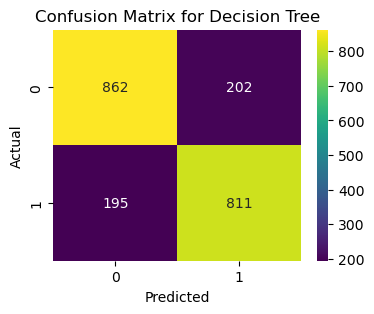

In [103]:
result('Decision Tree', y_test, y_pred_tree)

Random Forest
Accuracy: 82.02898550724638 %
Precision: 80.78770413064362 %
Recall: 83.02073050345508 %
F1 Score: 81.88899707887049 %


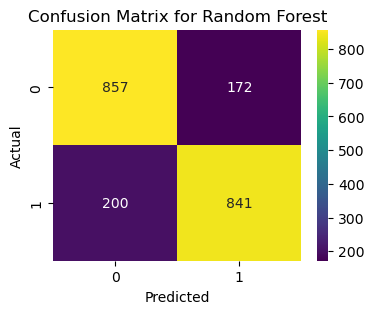

In [104]:
result('Random Forest', y_test, y_pred_rf)

Gradient Boosting Classifier
Accuracy: 83.81642512077295 %
Precision: 82.59615384615384 %
Recall: 84.79763079960513 %
F1 Score: 83.68241597661957 %


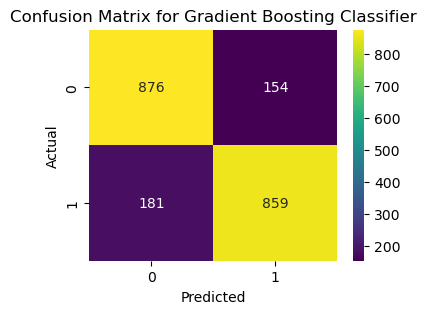

In [105]:
result('Gradient Boosting Classifier', y_test, y_pred_gbm)

In [106]:
#metrics are good for GBM model.

## LORENZ CURVE and Pareto Principle

**Logistic Regression**

In [123]:
y_pred_prob_both = logreg.predict_proba(X)
#predicting the probability of Churning, this will return an array of 2 columns.
#column 1 for class 0 and Column 2 for Class 1.
y_pred_prob = y_pred_prob_both[:, 1] #taking only column 2, i.e. probability of Churning.

df['pred_prob_logreg'] = pd.DataFrame(y_pred_prob) #Adding a column into existing Dataframe to store the above values.

ranked_values = df['pred_prob_logreg'].rank(method='first').values #dividing probability values into ranks.
#using method='first'.
df['P_Rank_logreg']=pd.qcut(ranked_values,10,duplicates='drop').codes+1
#converting the continuous values to decrete values of ranks into 10 quantiles and fetching their respective codes. 
#(adding 1 to each code, to avoid 0)

rank_df_actuals = df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
#grouping dataframe by ranks alloted and fetching value counts and average of y_actual.
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
#grouping dataframe by ranks alloted and fetching value counts and average of chrning probability.


In [124]:
rank_df_actuals=pd.DataFrame(rank_df_actuals)#storing the aggregates into a DataFrame
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True) #naming the columns
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)

rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner") #concatenating both the dataframes

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False) #sorting in rank indescending order to get top to bottom records.


#### Actual/Positive events

In [125]:
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate'] #mean*count = actual events happened.(adding a column to sorted dataframe)

sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative events

total_actual_events = max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['event_cap'] = sorted_rank_df['N_events']/total_actual_events #Event Captured, i.e proportion of total actual events captured 
#for the respective rank.

sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum() #Cumulative or total event captured in entire dataset.

#### Non-Events

In [126]:
sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events'] #non-events = total count - acual(positive events)

sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() #total non-events in the entire Dataset

sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
#NON-Event Captured, i.e proportion of total non-events captured for the respective rank.

sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum() #total non-events captured in the entire dataset.

sorted_rank_df['KS(Discrimination power)']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)
#The Kolmogorov-Smirnov statistic, i.e KS represents discriminatory power to predict Event and Non-event. 

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
#proportion of total observations captured by the model up to the respective rank if the observations were randomly selected.

sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
#cumulative gain to evaluate how well the model is performing compared to a scenario where observations are randomly selected.

sorted_reindexed=sorted_rank_df.reset_index() #resetting the index

sorted_reindexed['Decile']=sorted_reindexed.index+1 #adding a column 'Decile' to the final dataframe.
#it contains the index values after resetting the index, adding 1 to avoid 0.
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS(Discrimination power),random_cap,cum_random_cap,Decile
0,10,705,0.676596,0.875924,477.0,477.0,0.255217,0.255217,228.0,228.0,0.044066,0.044066,0.2112,0.100099,0.100099,1
1,9,704,0.546875,0.768450,385.0,862.0,0.205993,0.461209,319.0,547.0,0.061654,0.105721,0.3555,0.099957,0.200057,2
2,8,704,0.453125,0.632379,319.0,1181.0,0.170680,0.631889,385.0,932.0,0.074411,0.180131,0.4518,0.099957,0.300014,3
3,7,704,0.352273,0.465179,248.0,1429.0,0.132691,0.764580,456.0,1388.0,0.088133,0.268264,0.4963,0.099957,0.399972,4
4,6,704,0.225852,0.332024,159.0,1588.0,0.085072,0.849652,545.0,1933.0,0.105334,0.373599,0.4761,0.099957,0.499929,5
5,5,705,0.177305,0.197259,125.0,1713.0,0.066881,0.916533,580.0,2513.0,0.112099,0.485698,0.4308,0.100099,0.600028,6
6,4,704,0.113636,0.103197,80.0,1793.0,0.042804,0.959337,624.0,3137.0,0.120603,0.606301,0.3530,0.099957,0.699986,7
7,3,704,0.053977,0.049854,38.0,1831.0,0.020332,0.979668,666.0,3803.0,0.128721,0.735021,0.2446,0.099957,0.799943,8
8,2,704,0.035511,0.019602,25.0,1856.0,0.013376,0.993044,679.0,4482.0,0.131233,0.866254,0.1268,0.099957,0.899901,9
9,1,705,0.018440,0.005871,13.0,1869.0,0.006956,1.000000,692.0,5174.0,0.133746,1.000000,0.0000,0.100099,1.000000,10


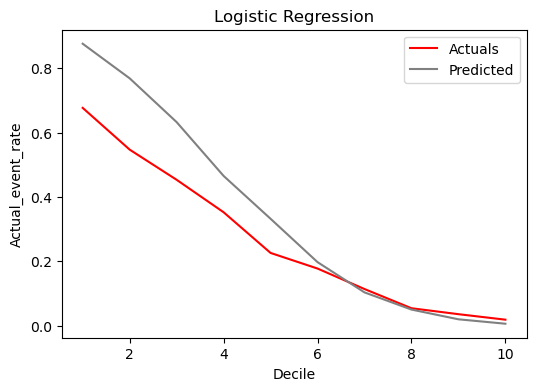

In [127]:
plt.figure(figsize = (6,4))
plt.title('Logistic Regression')
ax = sns.lineplot( x="Decile", y="Actual_event_rate", data =sorted_reindexed,color='red', label = "Actuals")
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey', label = "Predicted")
plt.show()

**Decision Tree**

In [128]:
#repeating same steps for Decision Tree
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.624113,0.912266,440.0,440.0,0.235420,0.235420,265.0,265.0,0.051218,0.051218,0.1842,0.100099,0.100099,1
1,9,704,0.656250,0.793941,462.0,902.0,0.247191,0.482611,242.0,507.0,0.046772,0.097990,0.3846,0.099957,0.200057,2
2,8,704,0.487216,0.615153,343.0,1245.0,0.183521,0.666132,361.0,868.0,0.069772,0.167762,0.4984,0.099957,0.300014,3
3,7,704,0.312500,0.442208,220.0,1465.0,0.117710,0.783842,484.0,1352.0,0.093545,0.261307,0.5225,0.099957,0.399972,4
4,6,704,0.261364,0.325611,184.0,1649.0,0.098448,0.882290,520.0,1872.0,0.100503,0.361809,0.5205,0.099957,0.499929,5
5,5,705,0.160284,0.230099,113.0,1762.0,0.060460,0.942750,592.0,2464.0,0.114418,0.476227,0.4665,0.100099,0.600028,6
6,4,704,0.092330,0.112845,65.0,1827.0,0.034778,0.977528,639.0,3103.0,0.123502,0.599729,0.3778,0.099957,0.699986,7
7,3,704,0.044034,0.048992,31.0,1858.0,0.016586,0.994114,673.0,3776.0,0.130073,0.729803,0.2643,0.099957,0.799943,8
8,2,704,0.012784,0.004288,9.0,1867.0,0.004815,0.998930,695.0,4471.0,0.134325,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.000000,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,-0.0000,0.100099,1.000000,10


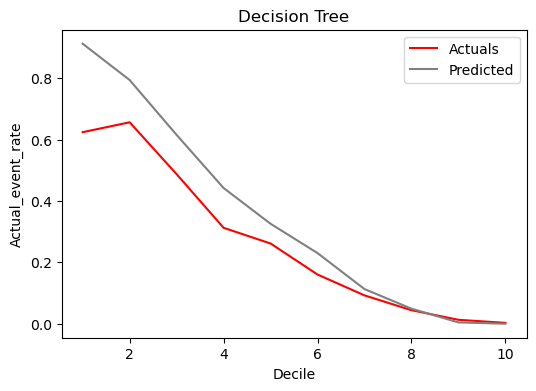

In [129]:
plt.figure(figsize = (6,4))
plt.title('Decision Tree')
ax = sns.lineplot( x="Decile", y="Actual_event_rate", data =sorted_reindexed,color='red', label = "Actuals")
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey', label = "Predicted")
plt.show()

**Random Forest Lorenz Curve**

In [130]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.699291,0.883998,493.0,493.0,0.263777,0.263777,212.0,212.0,0.040974,0.040974,0.2228,0.100099,0.100099,1
1,9,704,0.586648,0.744977,413.0,906.0,0.220974,0.484751,291.0,503.0,0.056243,0.097217,0.3875,0.099957,0.200057,2
2,8,704,0.485795,0.593329,342.0,1248.0,0.182986,0.667737,362.0,865.0,0.069965,0.167182,0.5006,0.099957,0.300014,3
3,7,704,0.353693,0.478535,249.0,1497.0,0.133226,0.800963,455.0,1320.0,0.087940,0.255122,0.5458,0.099957,0.399972,4
4,6,704,0.234375,0.352688,165.0,1662.0,0.088283,0.889246,539.0,1859.0,0.104175,0.359296,0.5299,0.099957,0.499929,5
5,5,705,0.139007,0.249184,98.0,1760.0,0.052434,0.941680,607.0,2466.0,0.117317,0.476614,0.4651,0.100099,0.600028,6
6,4,704,0.098011,0.145039,69.0,1829.0,0.036918,0.978598,635.0,3101.0,0.122729,0.599343,0.3793,0.099957,0.699986,7
7,3,704,0.039773,0.059256,28.0,1857.0,0.014981,0.993579,676.0,3777.0,0.130653,0.729996,0.2636,0.099957,0.799943,8
8,2,704,0.012784,0.019380,9.0,1866.0,0.004815,0.998395,695.0,4472.0,0.134325,0.864322,0.1341,0.099957,0.899901,9
9,1,705,0.004255,0.006426,3.0,1869.0,0.001605,1.000000,702.0,5174.0,0.135678,1.000000,0.0000,0.100099,1.000000,10


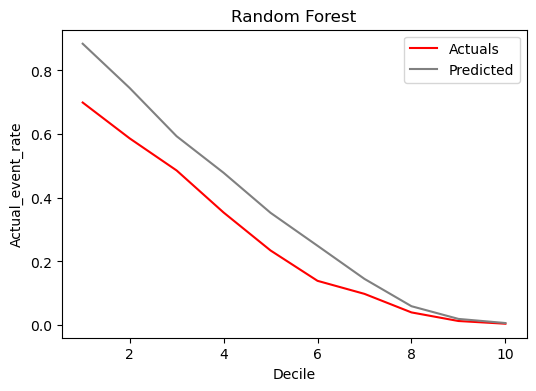

In [131]:
plt.figure(figsize = (6,4))
plt.title('Random Forest')
ax = sns.lineplot( x="Decile", y="Actual_event_rate", data =sorted_reindexed,color='red', label = "Actuals")
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey', label = "Predicted")
plt.show()

**Gradient Boosting Classifier**

In [132]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.865248,0.909288,610.0,610.0,0.326378,0.326378,95.0,95.0,0.018361,0.018361,0.3080,0.100099,0.100099,1
1,9,704,0.680398,0.762602,479.0,1089.0,0.256287,0.582665,225.0,320.0,0.043487,0.061848,0.5208,0.099957,0.200057,2
2,8,704,0.512784,0.591277,361.0,1450.0,0.193151,0.775816,343.0,663.0,0.066293,0.128141,0.6477,0.099957,0.300014,3
3,7,704,0.323864,0.407563,228.0,1678.0,0.121990,0.897806,476.0,1139.0,0.091998,0.220139,0.6777,0.099957,0.399972,4
4,6,704,0.133523,0.254599,94.0,1772.0,0.050294,0.948101,610.0,1749.0,0.117897,0.338036,0.6101,0.099957,0.499929,5
5,5,705,0.066667,0.143539,47.0,1819.0,0.025147,0.973248,658.0,2407.0,0.127174,0.465211,0.5080,0.100099,0.600028,6
6,4,704,0.044034,0.077891,31.0,1850.0,0.016586,0.989834,673.0,3080.0,0.130073,0.595284,0.3946,0.099957,0.699986,7
7,3,704,0.015625,0.037595,11.0,1861.0,0.005886,0.995720,693.0,3773.0,0.133939,0.729223,0.2665,0.099957,0.799943,8
8,2,704,0.008523,0.018266,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.008851,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,0.0000,0.100099,1.000000,10


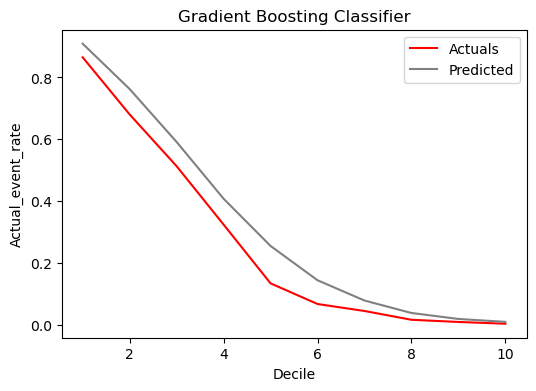

In [133]:
plt.figure(figsize = (6,4))
plt.title('Gradient Boosting Classifier')
ax = sns.lineplot( x="Decile", y="Actual_event_rate", data =sorted_reindexed,color='red', label = "Actuals")
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey', label = "Predicted")
plt.show()

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting 

# Within the High Value group, we can leverage the model to identify the best targets

In [146]:
tenure_ranks = df['tenure'].rank(method='first').values
df['Tenure_Rank']=pd.qcut(tenure_ranks,10,duplicates='drop').codes+1
#creating ranks for Tenure using same logic as used above.

df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])
#grouping by Ranks and fetching minimum, maximum, and average of tenure feature.

df['tenure'].mean()
#32.36 is the average tenure

df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")
#labelling Ranks as high and low, taking threshold as 6.


In [147]:
##Repeating the steps for MonthlyCharges.
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

df['MonthlyCharges'].mean()
#64.76 is the average Monthly Charge paid.

df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")


In [148]:
##Repeating same steps for Churning Probability values obtained by Ranking the probability values.
##Used GBM model
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")


**Slicing the data with respect to Top 4 and Bottom 6 Probability Ranks from the GBM Model**

In [149]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]
#dataframe for top 3 high probability ranks of Churning.
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
           ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling'] ##Feature Engineering

target = ['target'] #storing into target variable->'target' feature of DataFrame

total=service_list+target

df_top3_services=df_top3[service_list]
#df_top3_services stores the rows/records for al the services(columns) in service list from the dataframe df_top3,
#which has top 3 high probability of churning.



## Visualization

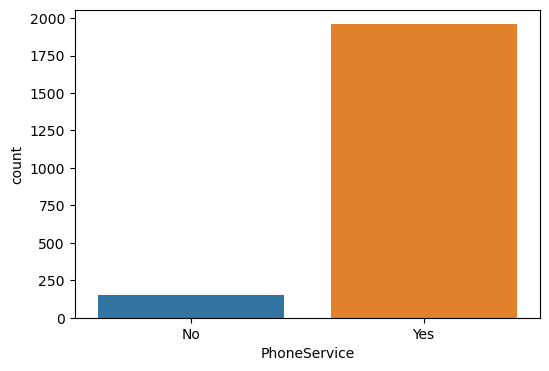

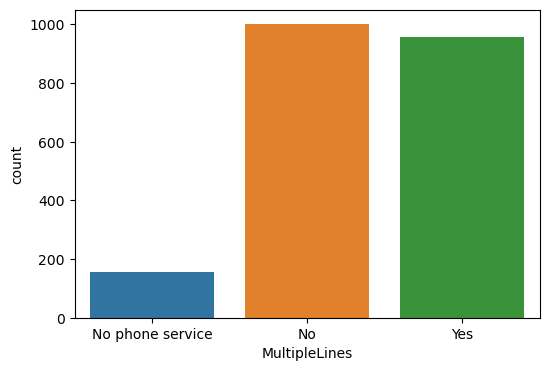

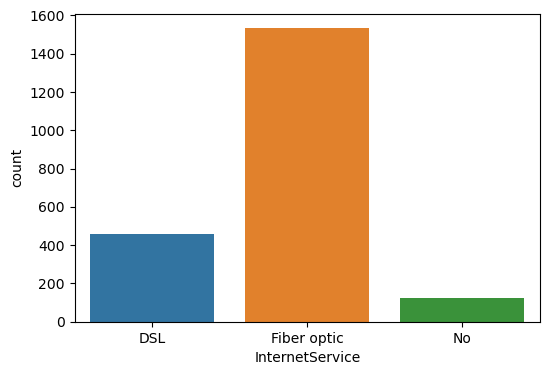

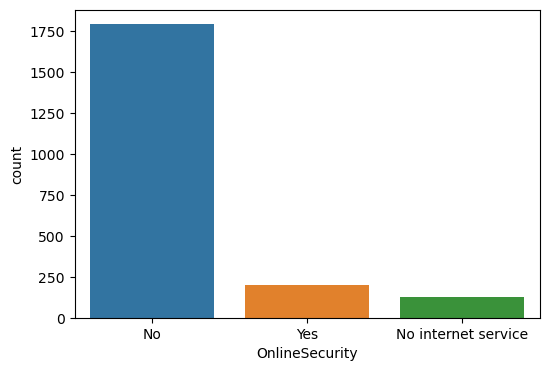

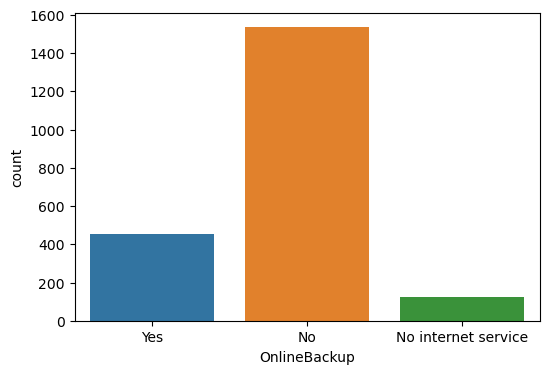

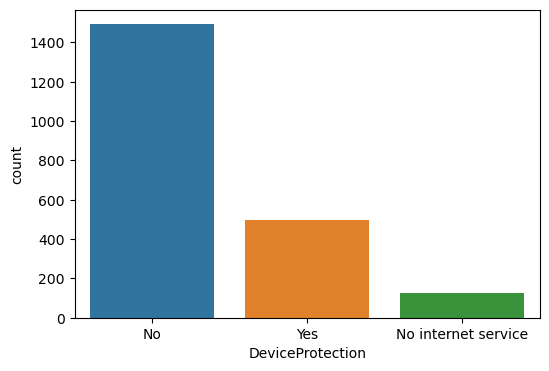

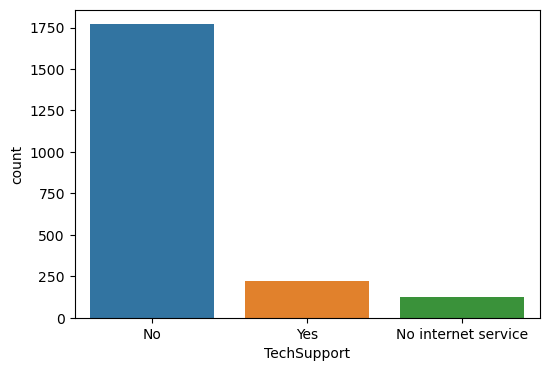

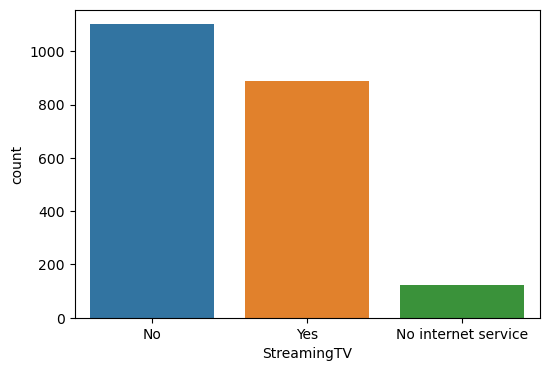

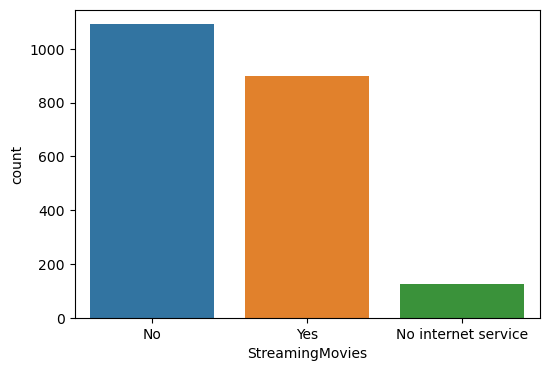

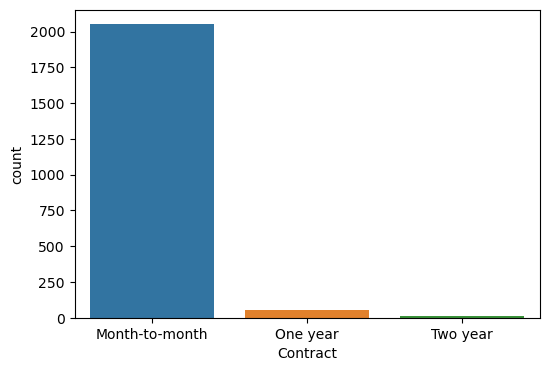

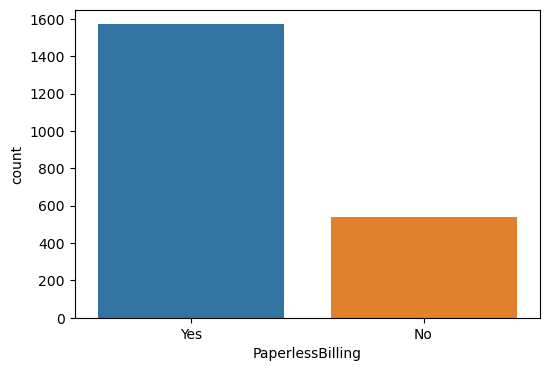

In [150]:
for col in (df_top3_services.columns):
    plt.figure(figsize = (6,4))
    sns.countplot(x=col,data=df_top3_services)
    plt.show()


In [151]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'],aggfunc='mean')
##crosstab for tenure vs monthly charges. (average)

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,98.755605,86.424729
Low Charges,49.420000,44.696613


In [152]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')
##crosstab for tenure vs monthly charges. (count)

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,223,1201
Low Charges,10,679


## Recommendations-
#### 1. Promote Device Protection with Online Services and Device Backup
#### 2. Maintainenance required in PhoneService.
#### 3. Convert customer to DSL if they are facing challenges with Fiber Optics\
#### 4. Promote Online Security
#### 5. Improve accessibility and visibility of Tech Support
#### 6. Offer discounts on Yearly contracts
#### 7. Improve Digital Billing process if the customers are facing issues.